In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\mukes\Downloads\breast cancer.csv', header=None)

## Exploratory data analysis

In [3]:
df.shape

(699, 11)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

In [6]:
df.columns = col_names

In [7]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
df.drop('Id', axis = 1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [10]:
for var in df.columns:
    print(df[var].value_counts())

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_thickness, dtype: int64
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity_Cell_Size, dtype: int64
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: Uniformity_Cell_Shape, dtype: int64
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal_Adhesion, dtype: int64
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single_Epithelial_Cell_Size, dtype: int64
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: Bland_Chromatin, dtype: int64
1     443
10     

In [11]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [12]:
df.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [13]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [14]:
df.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [15]:
df['Bare_Nuclei'].value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64

In [16]:
df1 = df.drop('Class', axis = 1)

Checking Distribution with pandas library

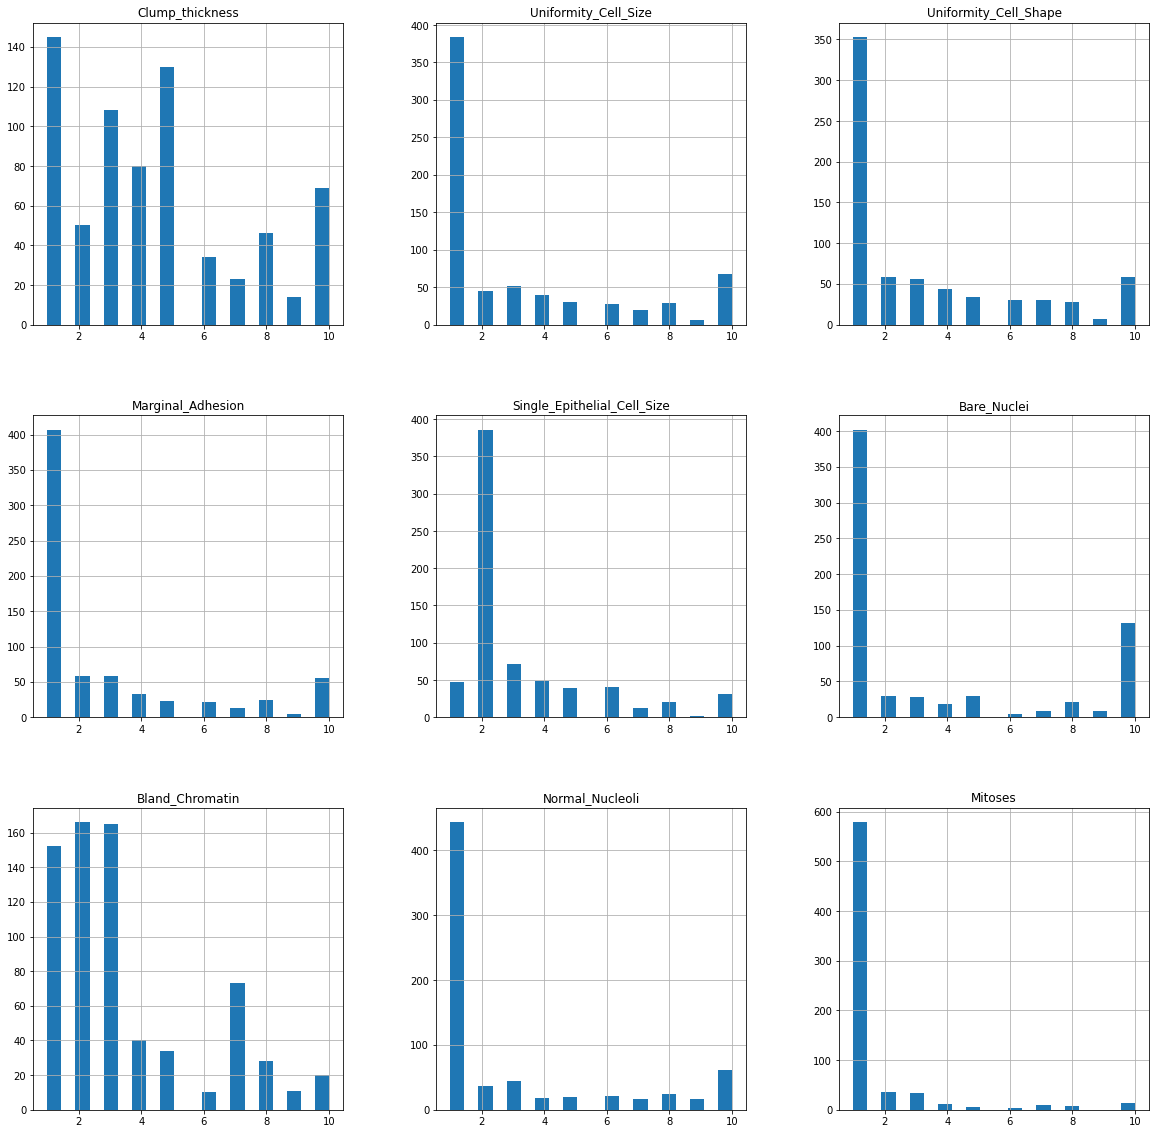

In [17]:
p = df1.hist(figsize=(20, 20), bins = 20)

Replacing Class Values with (0, 1)

In [18]:
df[['Class']] = df[['Class']].replace(2, 0)

In [19]:
df[['Class']] = df[['Class']].replace(4, 1)

Checking each class Values

In [20]:
df['Class'].value_counts()

0    458
1    241
Name: Class, dtype: int64

Visualizing Binary classes

c:\Users\mukes\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

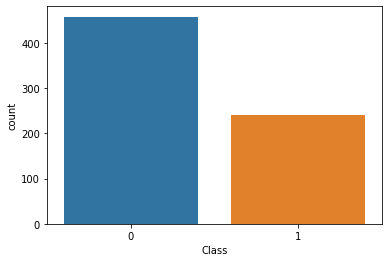

In [21]:
sns.countplot(df['Class'])

In [22]:
df.Class.value_counts()/np.float(len(df['Class'])) * 100

C:\Program Files\KMSpico\temp\ipykernel_13044\3691112722.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.Class.value_counts()/np.float(len(df['Class'])) * 100


0    65.522175
1    34.477825
Name: Class, dtype: float64

Five Number Summary

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_Cell_Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_Cell_Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland_Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,0.344778,0.475636,0.0,0.0,0.0,1.0,1.0


checking the distribution of features

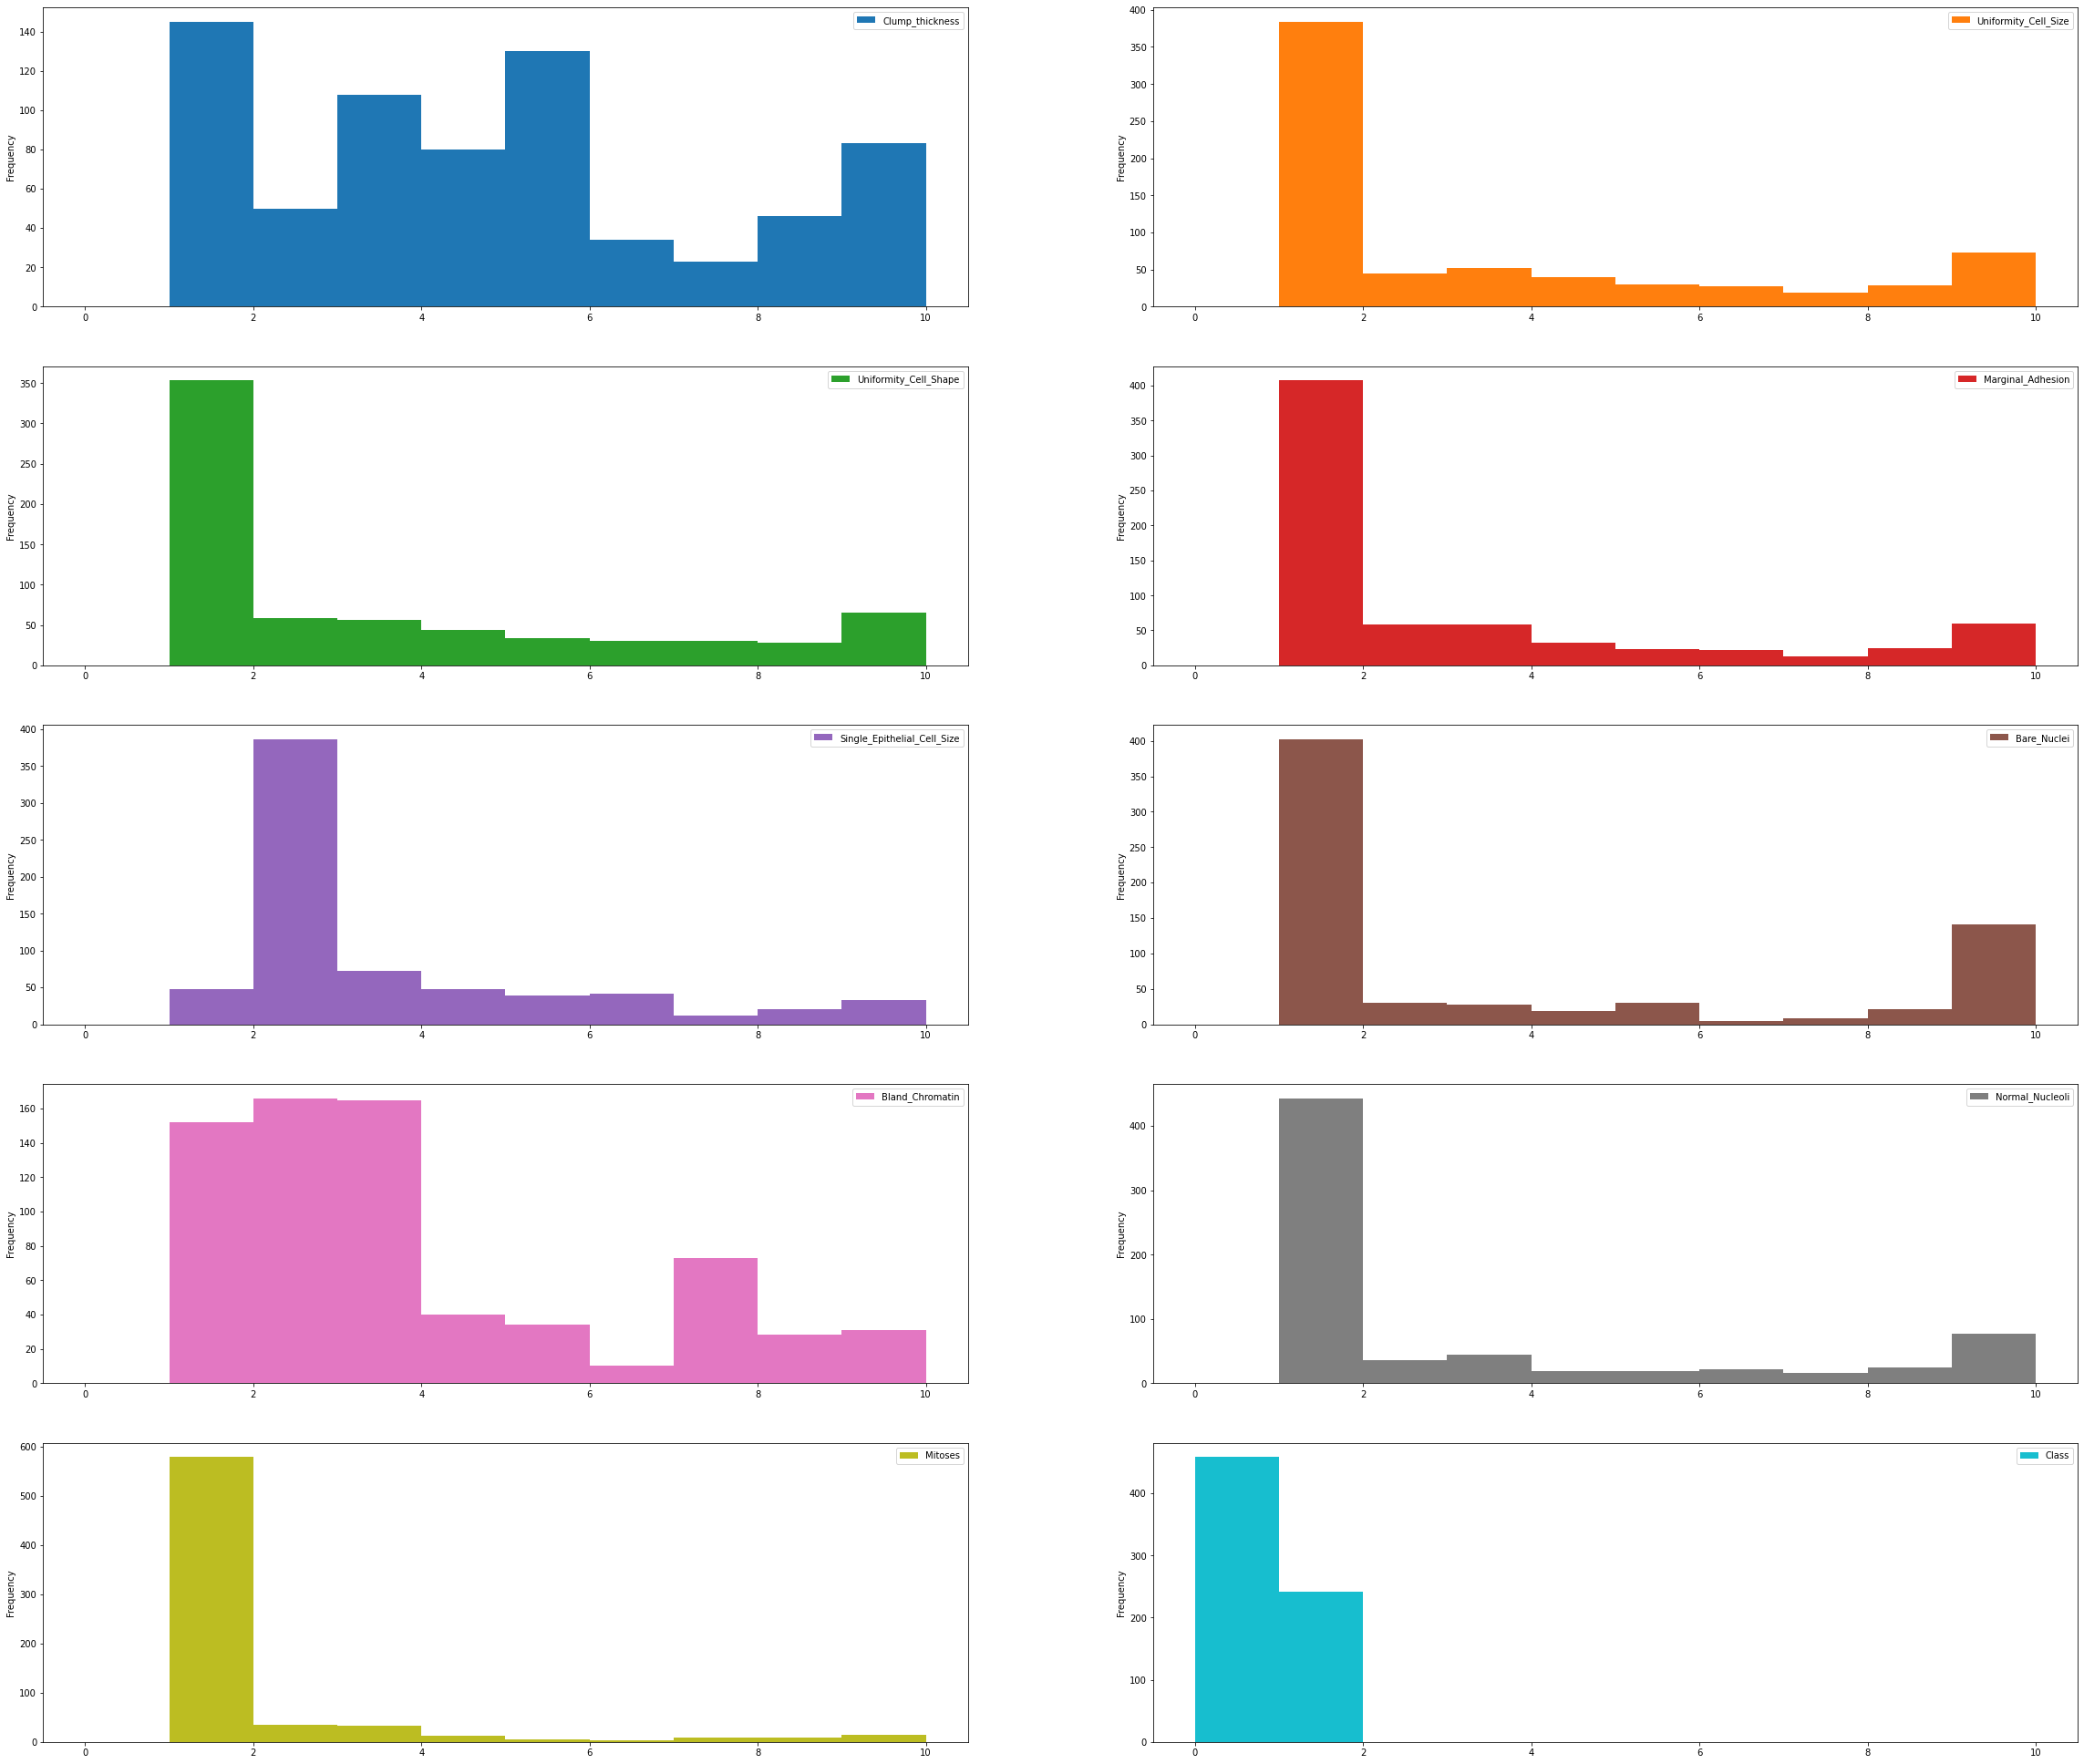

In [24]:
plt.rcParams['figure.figsize'] = (40, 35)
df.plot(kind = 'hist', bins = 10, subplots = True, layout = (5, 2), sharex = False, sharey = False)
plt.show()

Multivariate plots

In [25]:
correlation = df.corr()
correlation

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034,0.716001
Uniformity_Cell_Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693,0.817904
Uniformity_Cell_Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland_Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.822696,0.756616,0.712244,0.423170,1.000000


In [26]:
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

Plotting correlation heatmap among various features

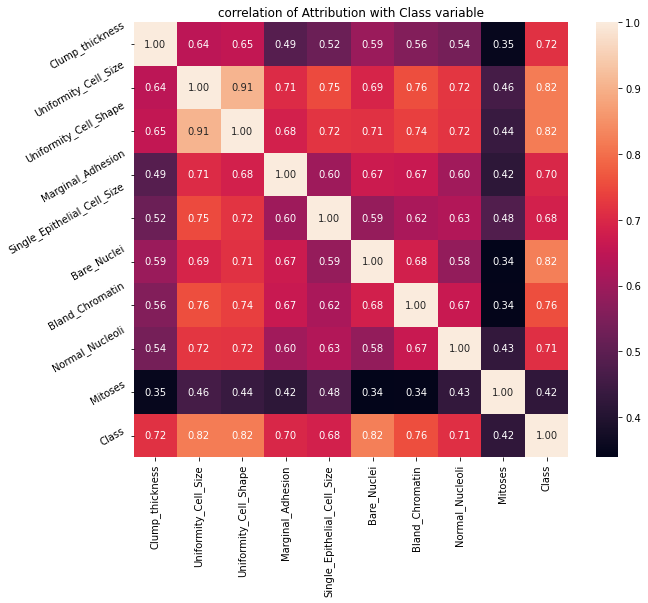

In [27]:
plt.figure(figsize=(10, 8))
plt.title('correlation of Attribution with Class variable')
a = sns.heatmap(correlation, square=True, annot = True, fmt = '.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation = 90)
a.set_yticklabels(a.get_yticklabels(), rotation = 30)
plt.show()

replacing missing values

In [28]:
df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].median(), inplace = True)

In [29]:
df['Bare_Nuclei'].isnull().sum()

0

In [30]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
X_train.shape, y_train.shape

((559, 9), (559,))

In [32]:
X_train.isnull().sum(), X_test.isnull().sum()

(Clump_thickness                0
 Uniformity_Cell_Size           0
 Uniformity_Cell_Shape          0
 Marginal_Adhesion              0
 Single_Epithelial_Cell_Size    0
 Bare_Nuclei                    0
 Bland_Chromatin                0
 Normal_Nucleoli                0
 Mitoses                        0
 dtype: int64,
 Clump_thickness                0
 Uniformity_Cell_Size           0
 Uniformity_Cell_Shape          0
 Marginal_Adhesion              0
 Single_Epithelial_Cell_Size    0
 Bare_Nuclei                    0
 Bland_Chromatin                0
 Normal_Nucleoli                0
 Mitoses                        0
 dtype: int64)

Feature Scaling

Standardizing values

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train = pd.DataFrame(X_train, columns = ['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses'])
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258


In [35]:
X_test = pd.DataFrame(X_test, columns = ['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses'])

In [36]:
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,-0.125209,-0.679581,-0.382092,-0.622471,-0.546543,-0.665096,-0.995595,-0.608165,-0.324258
1,-0.125209,-0.353219,-0.382092,-0.622471,-0.546543,-0.665096,-0.577774,-0.608165,-0.324258
2,0.592655,0.952231,0.961239,2.164005,1.280168,-0.665096,1.511331,1.664758,-0.324258
3,0.233723,-0.679581,-0.717925,-0.622471,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258
4,1.310519,1.278593,0.625406,2.512315,1.736846,1.577973,0.675689,0.690648,1.494406


## KNN algorithm

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [39]:
y_prob = knn.predict_proba(X_test)

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix, classification_report


Calculating Accuracy, recall, precission

In [41]:
print('Accuracy score: ', accuracy_score(y_test, y_pred),'\n')
print('recall_score: ', recall_score(y_test, y_pred),'\n')
print('precision_score: ', precision_score(y_test, y_pred))

Accuracy score:  0.9714285714285714 

recall_score:  0.9636363636363636 

precision_score:  0.9636363636363636


Calculating Confussion Matrix

In [42]:
cm = confusion_matrix(y_test, y_pred)
print('KNN confusion matrix values are : \n', cm)

KNN confusion matrix values are : 
 [[83  2]
 [ 2 53]]


In [43]:
plt.rcdefaults()

Plotting Confusion Matrtix

<AxesSubplot:>

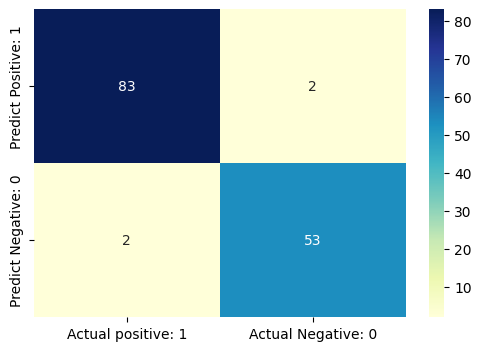

In [44]:
plt.figure(figsize = (6, 4))
cm_matrix = pd.DataFrame(data = cm, columns = ['Actual positive: 1', 'Actual Negative: 0'],
                        index = ['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

Plotting ROC_AUC Curve

Text(0.5, 0, 'False Positive Rate')

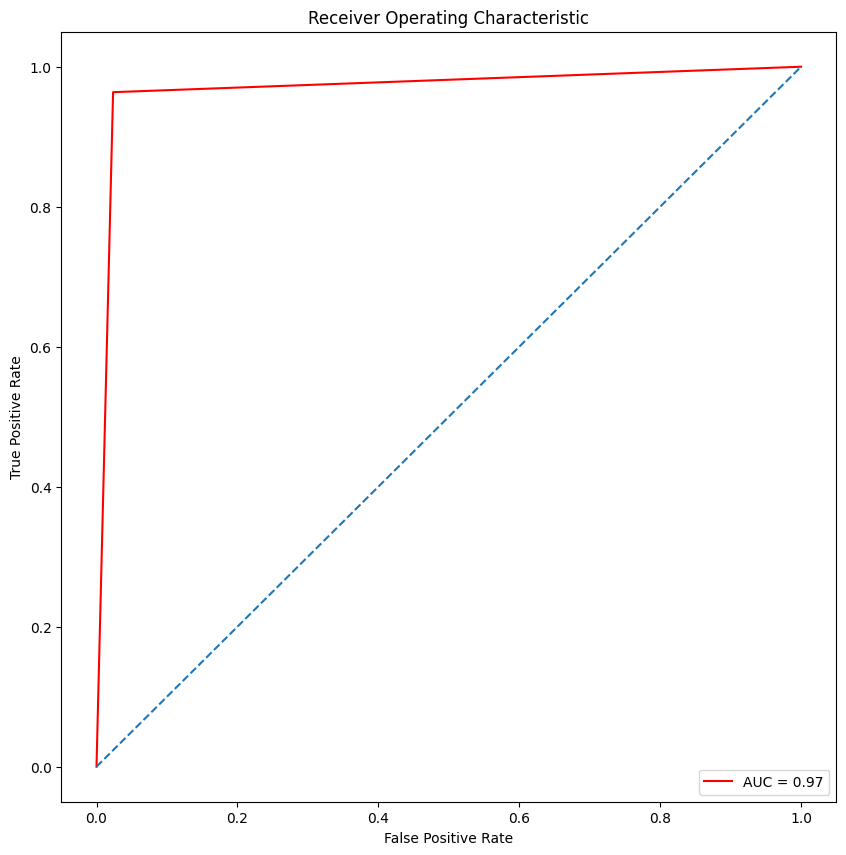

In [45]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Cross Validation score for KNN

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv = 2, scoring = 'accuracy')
print('Cross-validation mean score: {}'.format(np.mean(scores)))

Cross-validation mean score: 0.9624551971326165


## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [48]:
lg_y_pred = lg.predict(X_test)


Calculating Accuacy, precision, recall score for Logisitic Regression

In [49]:
print('Accuracy score: ', accuracy_score(y_test, lg_y_pred))
print('precision_score: ', precision_score(y_test, lg_y_pred))
print('recall_score: ', recall_score(y_test, lg_y_pred))

Accuracy score:  0.9714285714285714
precision_score:  0.9473684210526315
recall_score:  0.9818181818181818


Calulating Logistic Regression Confusion Matrix values

In [50]:
lg_cm_matrix = confusion_matrix(y_test, lg_y_pred)
lg_cm_matrix

array([[82,  3],
       [ 1, 54]], dtype=int64)

Plotting Confusion Matrix for Logisitc Regression

[]

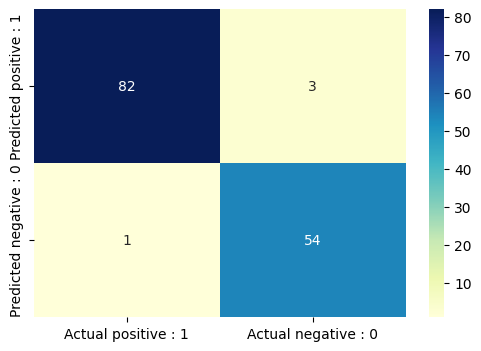

In [51]:
plt.figure(figsize = (6, 4))
cm_matrix = pd.DataFrame(data = lg_cm_matrix, columns = ['Actual positive : 1', 'Actual negative : 0'], index = ['Predicted positive : 1', 'Predicted negative : 0'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')
plt.plot()

Plotting AUC_ROC Curve For Logistic Regression

Text(0.5, 0, 'False Positive Rate')

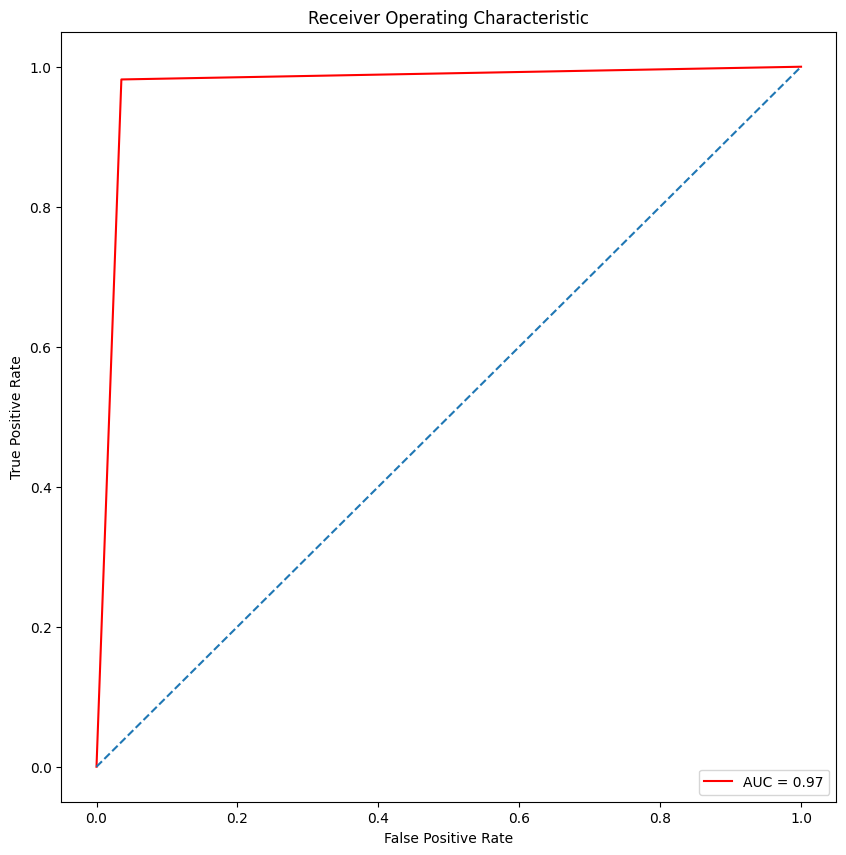

In [52]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, lg_y_pred)
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Cross validation score for Logistic Regression

In [53]:
score = cross_val_score(lg, X_train, y_train, cv = 10, scoring = 'accuracy')
print('cross validation mean accuracy for Logistic Regression is : ',  np.mean(score))

cross validation mean accuracy for Logistic Regression is :  0.9642532467532469


## Support Vector Classifier

Linear SVC

In [54]:
from sklearn.svm import SVC
linear_svc = SVC(kernel = 'linear', C = 1.0)
linear_svc.fit(X_train, y_train)
svc_y_pred = linear_svc.predict(X_test) 

Calculating Accuacy, precision, recall score for SVC

In [55]:
print('Accuracy score: ', accuracy_score(y_test, svc_y_pred))
print('precision_score: ', precision_score(y_test, svc_y_pred))
print('recall_score: ', recall_score(y_test, svc_y_pred))

Accuracy score:  0.9714285714285714
precision_score:  0.9473684210526315
recall_score:  0.9818181818181818


Calulating SVC Confusion Matrix values

In [56]:
svc_cm_matrix = confusion_matrix(y_test, svc_y_pred)
print('confusion matrix values for SVC: \n', svc_cm_matrix)

confusion matrix values for SVC: 
 [[82  3]
 [ 1 54]]


Plotting Confusion matrix for SVC

[]

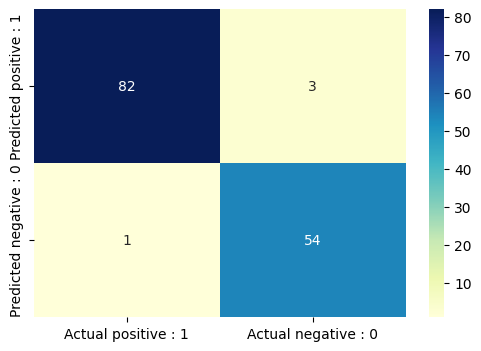

In [57]:
plt.figure(figsize = (6, 4))
cm_matrix = pd.DataFrame(data = svc_cm_matrix, columns = ['Actual positive : 1', 'Actual negative : 0'], index = ['Predicted positive : 1', 'Predicted negative : 0'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')
plt.plot()

Plotting ROC_AUC Curves

[]

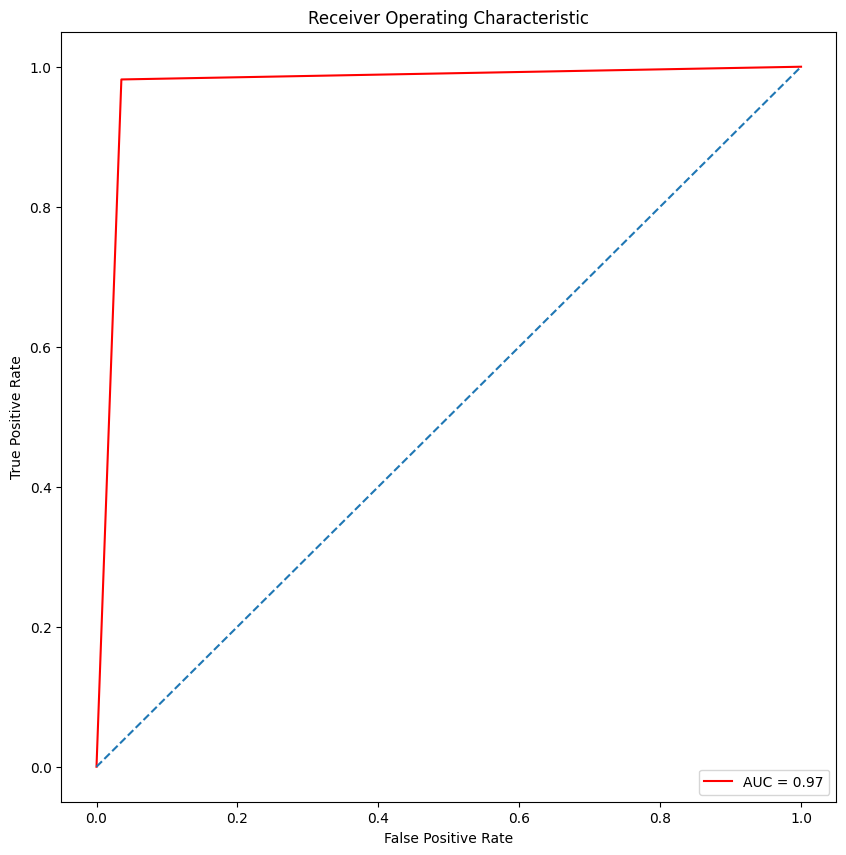

In [58]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, svc_y_pred)
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot()

In [59]:
score = cross_val_score(linear_svc, X_train, y_train, cv = 10, scoring = 'accuracy')
print('cross validation mean accuracy for linear SVC is : ',  np.mean(score))

cross validation mean accuracy for linear SVC is :  0.9642532467532469


## Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_y_pred = tree.predict(X_test)

Calculating Accuracy, precision, recall score

In [61]:
print('Accuracy score: ', accuracy_score(y_test, tree_y_pred))
print('precision_score: ', precision_score(y_test, tree_y_pred))
print('recall_score: ', recall_score(y_test, tree_y_pred))

Accuracy score:  0.9357142857142857
precision_score:  0.9259259259259259
recall_score:  0.9090909090909091


Calculating Decision Tree Classifier Cnfusion Matrix values

In [62]:
tree_cm = confusion_matrix(y_test, tree_y_pred)
print('Confusing Matrix values for Decsion Tree are: \n', tree_cm)

Confusing Matrix values for Decsion Tree are: 
 [[81  4]
 [ 5 50]]


Plotting Confusion matrix for SVC

[]

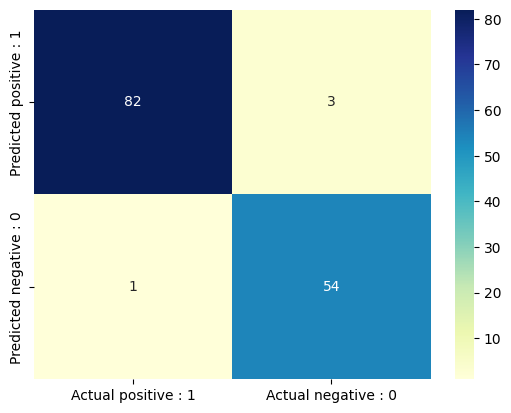

In [63]:
cm_matrixc = pd.DataFrame(data = tree_cm, columns = ['Actual values : 1', 'Predicted values : 0'], index = ['Predicted values : 1', 'Actual values : 0'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')
plt.plot()

Plotting AUC_ROC Curve for Decsion Tree

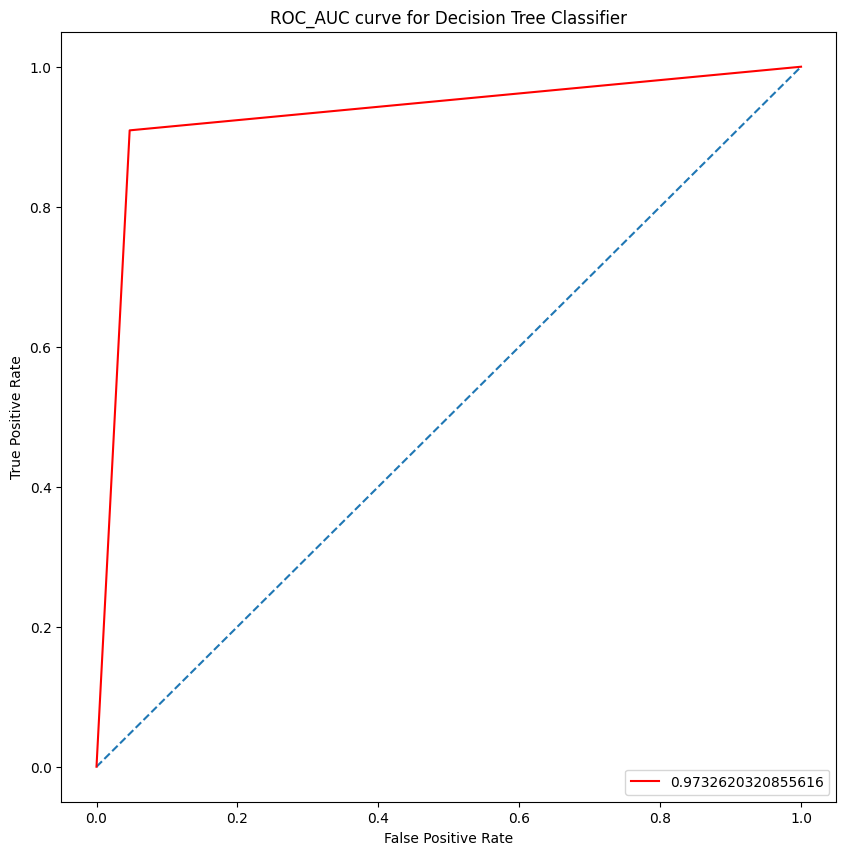

In [64]:
plt.figure(figsize = (10, 10))
roc_auc = auc(fpr, tpr)
fpr, tpr, thresholds = roc_curve(y_test, tree_y_pred)
plt.plot([0, 1], [0, 1], '--')
plt.plot(fpr, tpr,color = 'red', label = roc_auc)
plt.title('ROC_AUC curve for Decision Tree Classifier')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Cross validation score for Decision Tree 

In [65]:
score = cross_val_score(tree, X_train, y_train, cv = 10, scoring = 'accuracy')
print('cross validation mean accuracy for decsion tree is : ',  np.mean(score))

cross validation mean accuracy for decsion tree is :  0.9266558441558443


## RandomForest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

Calculating Accuracy, precision, recall Score

In [67]:
print('Accuracy score: ', accuracy_score(y_test, rf_y_pred))
print('precision_score: ', precision_score(y_test, rf_y_pred))
print('recall_score: ', recall_score(y_test, rf_y_pred))

Accuracy score:  0.9785714285714285
precision_score:  0.9642857142857143
recall_score:  0.9818181818181818


Calculating Confusion matrix for Random Forest

In [68]:
rf_cm = confusion_matrix(y_test, rf_y_pred)
print('Confusing Matrix values for Decsion Tree are: \n', rf_cm)

Confusing Matrix values for Decsion Tree are: 
 [[83  2]
 [ 1 54]]


Plotting Random Forest confusion matrix

[]

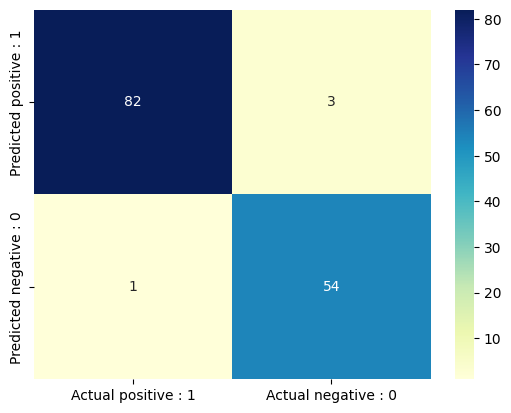

In [69]:
cm_matrixc = pd.DataFrame(data = rf_cm, columns = ['Actual values : 1', 'Predicted values : 0'], index = ['Predicted values : 1', 'Actual values : 0'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')
plt.plot()

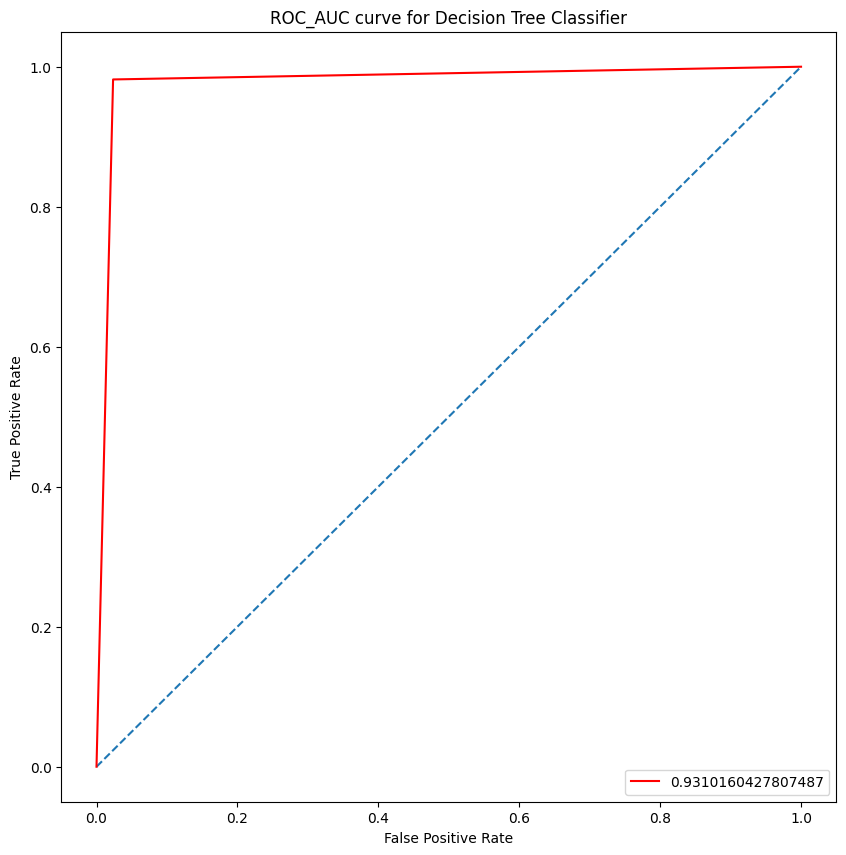

In [70]:
plt.figure(figsize = (10, 10))
roc_auc = auc(fpr, tpr)
fpr, tpr, thresholds = roc_curve(y_test, rf_y_pred)
plt.plot([0, 1], [0, 1], '--')
plt.plot(fpr, tpr,color = 'red', label = roc_auc)
plt.title('ROC_AUC curve for Decision Tree Classifier')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [71]:
print('KNN model classifcation report:\n ', classification_report(y_test, y_pred))

KNN model classifcation report:
                precision    recall  f1-score   support

           0       0.98      0.98      0.98        85
           1       0.96      0.96      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [72]:
print('Logistic Regression classification report: \n', classification_report(y_test, lg_y_pred))

Logistic Regression classification report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98        85
           1       0.95      0.98      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [73]:
print('Linear SVC classification report: \n', classification_report(y_test, svc_y_pred))

Linear SVC classification report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98        85
           1       0.95      0.98      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [74]:
print('Decision Tree Classifier Classification report: \n', classification_report(y_test, tree_y_pred))

Decision Tree Classifier Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95        85
           1       0.93      0.91      0.92        55

    accuracy                           0.94       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.94      0.94      0.94       140



In [75]:
print('Random Forest Classifier Classification report: \n', classification_report(y_test, rf_y_pred))

Random Forest Classifier Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        85
           1       0.96      0.98      0.97        55

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [77]:
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,-0.125209,-0.679581,-0.382092,-0.622471,-0.546543,-0.665096,-0.995595,-0.608165,-0.324258
1,-0.125209,-0.353219,-0.382092,-0.622471,-0.546543,-0.665096,-0.577774,-0.608165,-0.324258
2,0.592655,0.952231,0.961239,2.164005,1.280168,-0.665096,1.511331,1.664758,-0.324258
3,0.233723,-0.679581,-0.717925,-0.622471,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258
4,1.310519,1.278593,0.625406,2.512315,1.736846,1.577973,0.675689,0.690648,1.494406


In [84]:
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)